In [8]:
import ee
import os
import pandas as pd
from datetime import datetime as dt
from pathlib import Path
from abd import abd

In [9]:
__version__ = ""
exec(Path(f"{os.getcwd()}/src/abd/version.py").read_text(encoding="utf-8"))

In [ ]:
# Autenticar o Google Earth Engine
# copy the token in the available input
#ee.Authenticate(authorization_code="4/1ARtbsJqJyET2mnX3AySFhE239ptvdbbrXK6U_qn0keFwnxr3N0pmCZFB8IM", code_verifier="W9nx2_QmjaWy9lwWSrB1uZRcumzWUaU2gySuViNJA9Q:nE44qMl8TPh9L5uQx-SNTeJwcmEtBINQ6DWADgWGICc:j3tikGGIsrkxRQEA4D3YKt5BL6w09U37JGy9YK7B9q4")
ee.Authenticate(quiet='init_only')

Paste the following address into a web browser:

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=OeZylLpPqbx_zTyjYpL91zRynU-MeRT--2q2xdxzJus&tc=p20mUb-L8nEkq1oSiShzdkx2KHsuaMehR4GET4PX6u4&cc=hu9f6j-sUTCWmt1Wdrm6dUm2_OjVlz1JMQ6XPSW1nJI

On the web page, please authorize access to your Earth Engine account and copy the authentication code. Next authenticate with the following command:

    earthengine authenticate --code-verifier=OeZylLpPqbx_zTyjYpL91zRynU-MeRT--2q2xdxzJus:MhV9nMn3jx_AqZ-3ymVYnq1MLVoWxFDhAq8KOxkE62w:GXH3a1tE-FB6oUmYdoqskDMKT1MHW1xdDH7muhOHer4 --authorization-code=PLACE_AUTH_CODE_HERE



In [4]:
# Initialize Google Earth Engine
ee.Initialize()

# Data path
folderRoot = os.getcwd() + "/results"
if not os.path.exists(folderRoot):
    os.mkdir(folderRoot)

# Images path
folderCache = os.getcwd() + "/cache"
if not os.path.exists(folderCache):
    os.mkdir(folderCache)
    
# Selected image date to dectection
selectedDate = "2019-06-03"

# folder to save results from algorithm at
folder = (
    folderRoot
    + "/"
    + dt.now().strftime("%Y%m%d_%H%M%S")
    + f"[v={str(__version__)}-sandbox,d={selectedDate},t=180,m=ocsvm,s=modis]")
if not os.path.exists(folder):
    os.mkdir(folder)

In [5]:
# fix permissions
!chmod 777 $folderRoot
!chmod 777 $folder
!chmod 777 $folderCache

zsh:1: no matches found: /Users/phmananias/Documents/unesp/abd/output/20221023_204247[v=v0.27.2-sandbox,d=2019-06-03,t=180,m=ocsvm,s=modis]


In [7]:
# create algorithm object
algorithm = abd.Abd(lat_lon="-83.50124371805877,41.88435023280987,-83.07548096199702,41.65275061592091",
                    date=selectedDate,
                    days_threshold=180,
                    model="ocsvm",
                    sensor="modis",
                    cache_path=folderCache)


Selected sensor: Modis MOD09GA.006 [GEE Dataset = MODIS/006/MOD09GA]

Check if requested date is good for processing [2019-06-03]...
Extracting geometry (0) 1 of 1...
Pixel and cloud score for geometry #1: 1.0 and 0.73926!
Ok, image is good for processing: 1

Statistics: scale=500 meters, pixels=4845, date_start='2018-12-05', date_end='2019-11-30', interval_images='360', interval_unique_images='360', water_mask_images='16', days_threshold='180', morph_op='None', morph_op_iters='1', convolve='False', convolve_radius='1', scaler='robust', model='ocsvm', outliers_zscore='3.0', attributes='['cloud', 'ndvi', 'fai']', attribute_doy='False'


In [8]:
# creating timeseries based on days_thresholds
algorithm.process_timeseries_data()


Starting time series processing ...
Trying to extract it from the cache...
finished!


In [9]:
# creating train and grid datasets
algorithm.process_training_data(df=algorithm.df_timeseries)


Processing training data...
               pixel          index            doy            lat  \
count  401783.000000  401783.000000  401783.000000  401783.000000   
mean     1984.988402  253967.953721     190.586324     -83.251028   
std      1200.688392  146929.328625      93.111444       0.105763   
min         0.000000       0.000000       3.000000     -83.500651   
25%       958.000000  127015.500000     125.000000     -83.338955   
50%      1919.000000  254102.000000     201.000000     -83.244632   
75%      2970.000000  380877.500000     262.000000     -83.159292   
max      4797.000000  508677.000000     364.000000     -83.078443   

                 lon          cloud           ndvi            fai  \
count  401783.000000  401783.000000  401783.000000  401783.000000   
mean       41.771024       0.161562      -0.489108      -0.015598   
std         0.061686       0.368049       2.131490       0.033389   
min        41.657126       0.000000    -201.000000      -0.128008   
25% 

In [10]:
# start training process
algorithm.train()


Starting the training process...

Creating the OneClass Support Vector Machines with RandomizedSearchCV parameterization model...
Starting RandomizedSearch (3980 pixels) parameters selection...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Evaluating the OneClassSVM (kernel=rbf,gamma=0.012854801998110574,nu=0.17506605239815523,shrinking=False) model...
Report for the OneClassSVM (kernel=rbf,gamma=0.012854801998110574,nu=0.17506605239815523,shrinking=False) model: Acc:0.7945, F1-Score:0.7969, Kappa:0.5554, vKappa:0.0, Tau:0.5573, vTau:0.0, p-value:0.0, Mcc:0.5573, TP:30840, FP:14577, TN:64029, FN:9956
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     78606
           1       0.68      0.76      0.72     40796

    accuracy                           0.79    119402
   macro avg       0.77      0.79      0.78    119402
weighted avg       0.80      0.79      0.80    119402

finished!


In [11]:
# apply detection algorithm
algorithm.detect()


Starting 2019-06-03 image detection process (3779)...
             pixel          index     doy          lat          lon  \
count  3779.000000    3779.000000  3779.0  3779.000000  3779.000000   
mean   1984.423922  176404.423922   154.0   -83.250967    41.771626   
std    1205.178151    1205.178151     0.0     0.106159     0.061921   
min       0.000000  174420.000000   154.0   -83.500651    41.657126   
25%     950.500000  175370.500000   154.0   -83.338955    41.720008   
50%    1917.000000  176337.000000   154.0   -83.244632    41.769415   
75%    2976.500000  177396.500000   154.0   -83.159292    41.823314   
max    4797.000000  179217.000000   154.0   -83.078443    41.881704   

             cloud         ndvi          fai  ndvi_median   fai_median  \
count  3779.000000  3779.000000  3779.000000  3779.000000  3779.000000   
mean      0.157184    -0.532352    -0.008318    -0.486092    -0.014611   
std       0.364023     1.532724     0.029331     0.227629     0.019183   
min      

In [12]:
# save geojson
algorithm.save_geojsons(folder=folder+"/geojson")


Saving GeoJSONs to folder '/Users/phmananias/Documents/unesp/abd/output/20221023_204247[v=v0.27.2-sandbox,d=2019-06-03,t=180,m=ocsvm,s=modis]/geojson'...
finished!


In [13]:
# save results
algorithm.save_dataset(df=algorithm.df_results, path=folder+'/results.csv')


Creating detection plot to file '/Users/phmananias/Documents/unesp/abd/output/20221023_204247[v=v0.27.2-sandbox,d=2019-06-03,t=180,m=ocsvm,s=modis]/detection.png'...
finished!


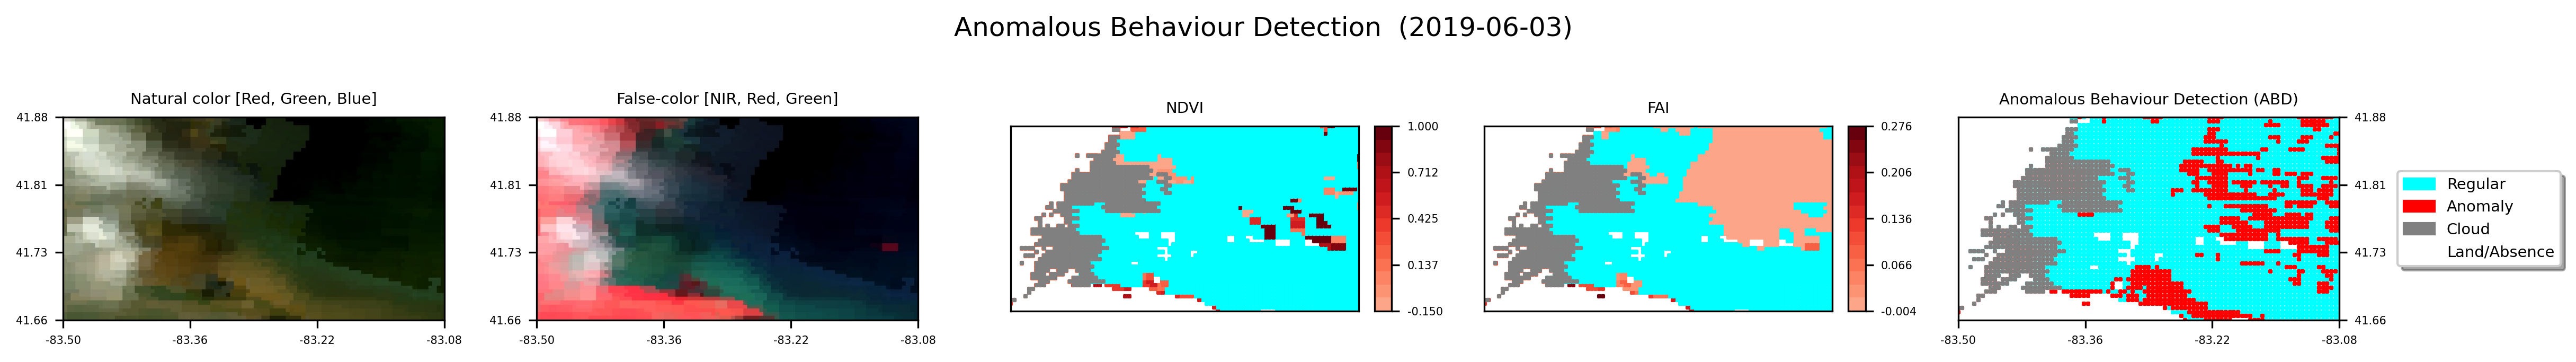

In [14]:
# save detection plot
algorithm.save_detection_plot(path=folder+'/detection.png')